# **Projek Machine Learning (Clustering)**

Nama : Fadhlurrahman Akbar Nasution

NIM  : 1301194258

Kelas : IF-43-09

## **Impoart Libarry Yang Digunakan**

In [994]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns

**Memasukan dataset yang akan digunakan

In [995]:
# df_train = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/Documents/Kuliah/SEMESTER_5/Machine_Learning/Tubes_ML_Clustering/Data/kendaraan_train.csv')
df_train = pd.read_csv('Data/kendaraan_train.csv')
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [996]:
df_train.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

#Data PrePocessing

In [997]:
#mengubah data dari string enjadi integer agar mudah diproses
df_train['Jenis_Kelamin']= df_train['Jenis_Kelamin'].str.replace('Pria','1')
df_train['Jenis_Kelamin']= df_train['Jenis_Kelamin'].str.replace('Wanita','0')
df_train['Kendaraan_Rusak']= df_train['Kendaraan_Rusak'].str.replace('Pernah','1')
df_train['Kendaraan_Rusak']= df_train['Kendaraan_Rusak'].str.replace('Tidak','0')
df_train['Umur_Kendaraan']= df_train['Umur_Kendaraan'].str.replace('< 1 Tahun','0')
df_train['Umur_Kendaraan']= df_train['Umur_Kendaraan'].str.replace('1-2 Tahun','1')
df_train['Umur_Kendaraan']= df_train['Umur_Kendaraan'].str.replace('> 2 Tahun','2')

#drop kolom yang tidak digunakan
del df_train['id']
del df_train['Tertarik']
#ubah Nilai menjadi numeric
df_train['Jenis_Kelamin']= pd.to_numeric(df_train['Jenis_Kelamin'])
df_train['Kendaraan_Rusak']= pd.to_numeric(df_train['Kendaraan_Rusak'])
df_train['Umur_Kendaraan']= pd.to_numeric(df_train['Umur_Kendaraan'])

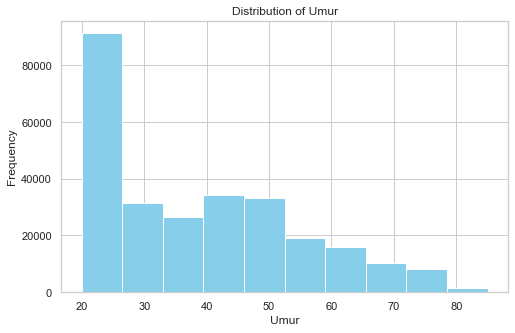

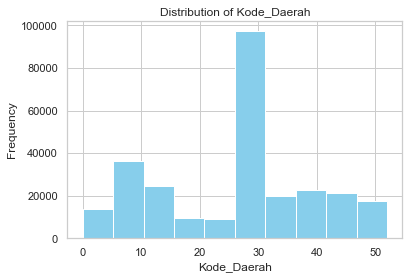

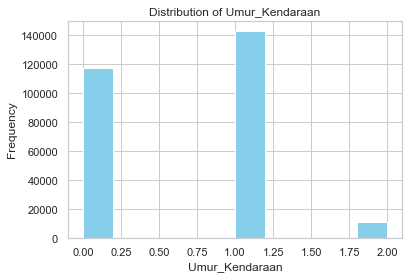

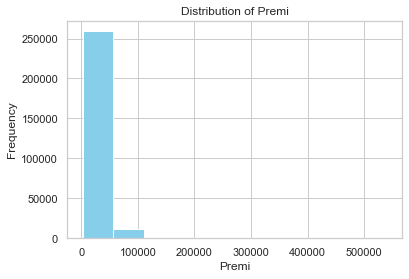

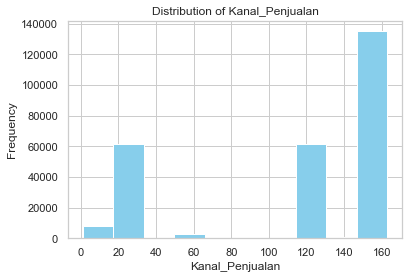

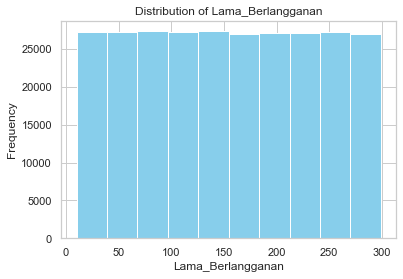

In [998]:
kolom_banyak = ['Umur','Kode_Daerah','Umur_Kendaraan','Premi','Kanal_Penjualan','Lama_Berlangganan']
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
for i in kolom_banyak:
    plt.hist(df_train[i],color='skyblue')
    plt.title(f'Distribution of {i}') 
    plt.xlabel(f'{i}') 
    plt.ylabel('Frequency')
    plt.show()

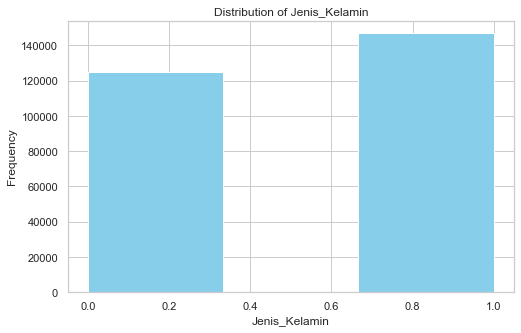

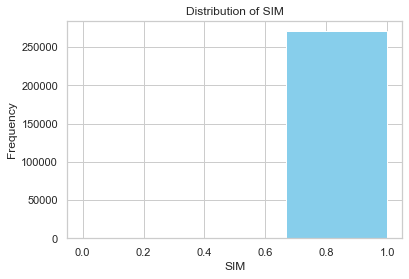

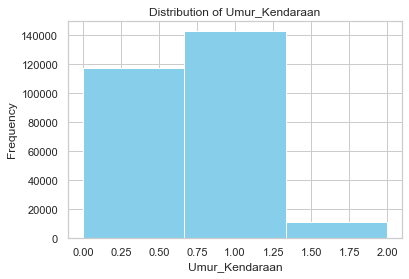

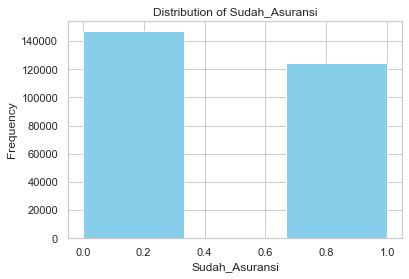

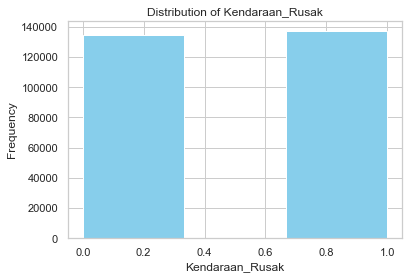

In [999]:
kolom_sedikit = ['Jenis_Kelamin','SIM','Umur_Kendaraan','Sudah_Asuransi','Kendaraan_Rusak']
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
for i in kolom_sedikit:
    plt.hist(df_train[i],bins=3,color='skyblue')
    plt.title(f'Distribution of {i}') 
    plt.xlabel(f'{i}') 
    plt.ylabel('Frequency')
    plt.show()

In [1000]:
df_train['Premi'].value_counts()

2630.0     46272
69856.0       98
38287.0       29
45179.0       28
30117.0       28
           ...  
49839.0        1
86452.0        1
47235.0        1
63607.0        1
65015.0        1
Name: Premi, Length: 45114, dtype: int64

In [1001]:
df_train.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [1002]:
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0


In [1003]:
#Menggunakna Mean Ketika data memiliki distribusi normal 
col_mean = ['Kode_Daerah','Lama_Berlangganan','Kanal_Penjualan','Kendaraan_Rusak']
df_train[col_mean]=df_train[col_mean].fillna(df_train.mean())

#Menggunakna Mode(modus) jika data kategorikal dan perbedaan hasilnya sangat jauh
df_train['SIM'].fillna(df_train['SIM'].mode()[0], inplace=True)

#Menggunakan Median jika distribusi data memiliki kemiringan(skewness)
col_median = ['Umur','Jenis_Kelamin','Umur_Kendaraan','Premi','Sudah_Asuransi']
for i in col_median:
    df_train[i].fillna(df_train[i].median(), inplace=True)

In [1004]:

df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [1005]:
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,0.000000,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.000000,25800.0,29.0,158.0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.000000,32733.0,160.0,119.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.000000,2630.0,124.0,63.0
4,1.0,50.0,1.0,35.0,0.0,2.0,0.504791,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.000000,25988.0,152.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.000000,44686.0,152.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.000000,49751.0,152.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.000000,30503.0,124.0,270.0


In [1006]:
#pengecekan data yang duplikat
df_train[df_train.duplicated()]

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
24277,1.0,21.0,1.0,14.00000,1.0,0.0,0.0,2630.0,160.0,202.000000
26774,1.0,41.0,1.0,26.40541,0.0,1.0,1.0,2630.0,124.0,76.000000
38835,0.0,23.0,1.0,41.00000,1.0,0.0,0.0,31646.0,152.0,154.286302
40755,0.0,69.0,1.0,1.00000,1.0,1.0,0.0,2630.0,124.0,22.000000
43123,0.0,53.0,1.0,28.00000,1.0,1.0,0.0,2630.0,124.0,143.000000
...,...,...,...,...,...,...,...,...,...,...
283086,1.0,39.0,1.0,28.00000,0.0,1.0,1.0,2630.0,26.0,154.286302
283606,1.0,42.0,1.0,26.40541,0.0,1.0,1.0,2630.0,124.0,154.286302
284038,0.0,46.0,1.0,28.00000,0.0,1.0,1.0,31646.0,24.0,154.286302
285254,0.0,43.0,1.0,28.00000,0.0,1.0,1.0,2630.0,124.0,252.000000


In [1007]:
#Melakukan drop dengan data yang duplikat
df_train=df_train.drop_duplicates()
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,0.000000,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.000000,25800.0,29.0,158.0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.000000,32733.0,160.0,119.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.000000,2630.0,124.0,63.0
4,1.0,50.0,1.0,35.0,0.0,2.0,0.504791,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.000000,25988.0,152.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.000000,44686.0,152.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.000000,49751.0,152.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.000000,30503.0,124.0,270.0


#Fitur Handle Outlier

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

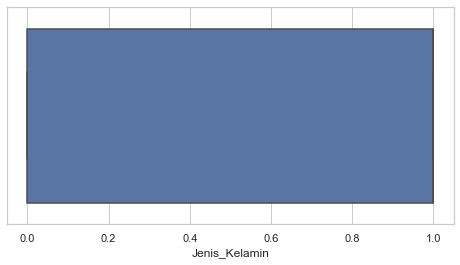

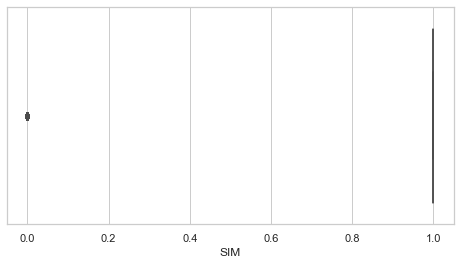

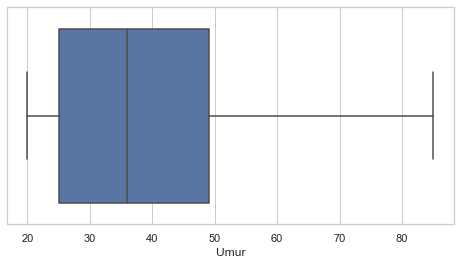

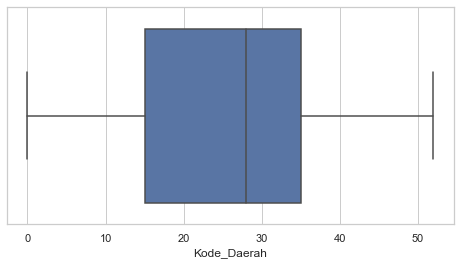

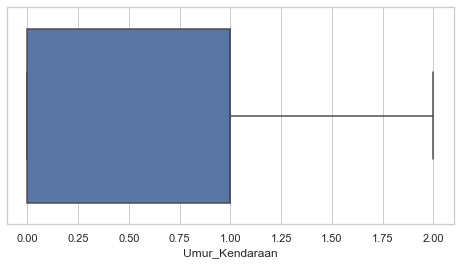

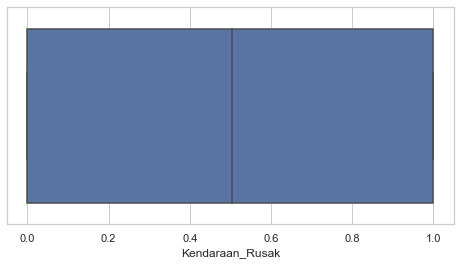

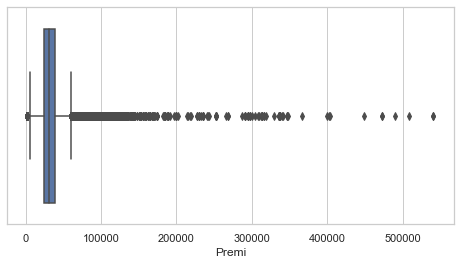

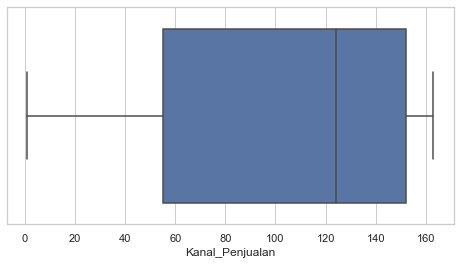

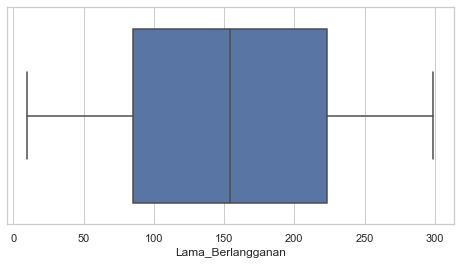

In [1008]:
fitur = ['Jenis_Kelamin','SIM','Umur','Kode_Daerah','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Lama_Berlangganan']

for i in fitur:
    fig = plt.figure(figsize=(8,4))
    sns.boxplot(df_train[i])
# boxplot = df_train.boxplot(column= ['Umur','Kode_Daerah','Umur_Kendaraan','Kendaraan_Rusak','Kanal_Penjualan','Lama_Berlangganan'])

In [1009]:
#Membuat pembersihaan outlier 
def outlier_detection(data_column):
    sorted(data_column)
    Q1 ,Q3 = np.percentile(data_column,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range, upper_range

In [1010]:
outlier = []
col = ['SIM', 'Premi']
for i in col:
    lowerbound, upperbound = outlier_detection(df_train[i])
    outlier = df_train[~((df_train[i]<lowerbound) | (df_train[i]>upperbound))]

In [1011]:
df_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Premi'>

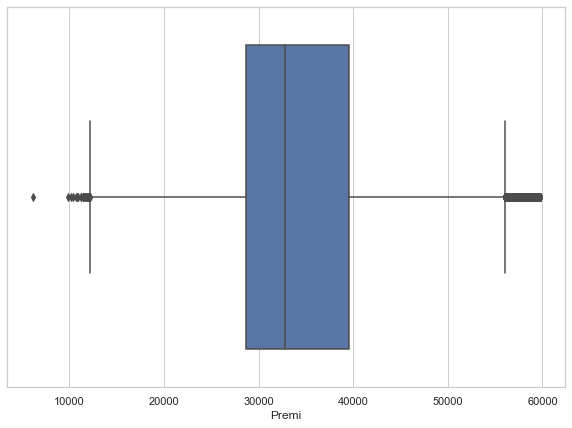

In [1012]:
fig = plt.figure(figsize=(10,7))
sns.boxplot(outlier['Premi'])

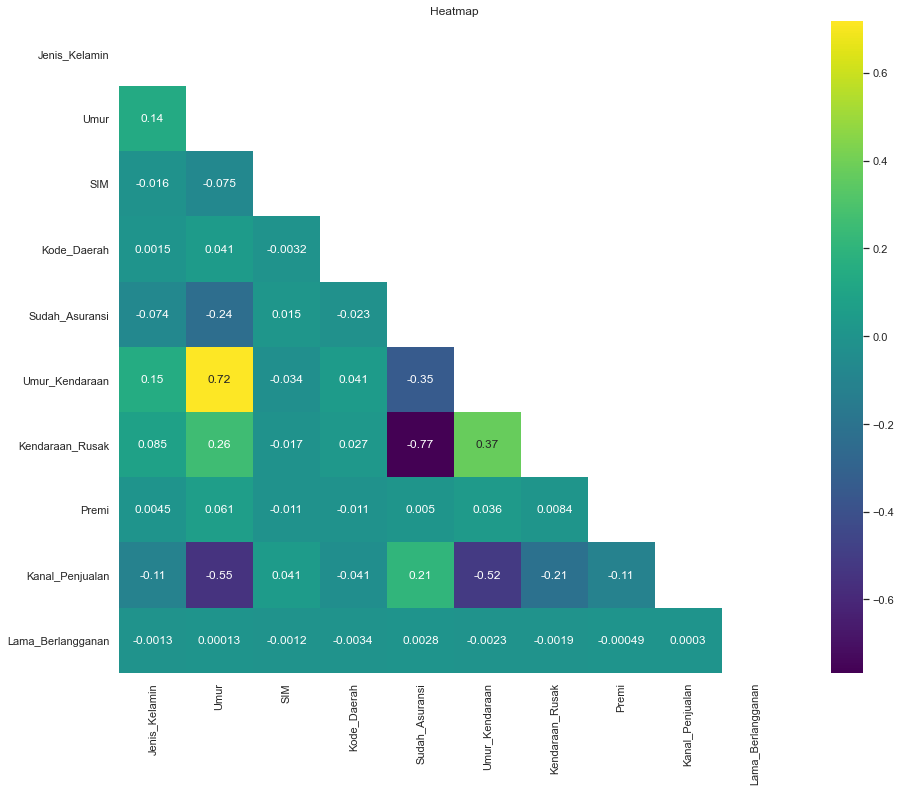

In [1013]:
mask = np.triu(np.ones_like(df_train.corr(),dtype=bool))
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(df_train.corr(), mask=mask, annot=True,cmap='viridis')
    ax.set_title('Heatmap')
plt.show()

## **Normalisasi Data**

In [1014]:
# Melakukan Normalisasi Data Menggunakan z-score method
df_trainNormalisasi = (df_train - df_train.mean())/(df_train.std())
df_trainNormalisasi

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,-1.136570,-0.574676,0.04527,0.510533,1.137469,-1.124416,-1.035599,-0.154619,0.756766,-0.701637
1,0.879837,0.613679,0.04527,0.975028,-0.879142,2.449067,1.016106,-0.288042,-1.571460,0.045581
2,0.879837,-1.168853,0.04527,1.516938,1.137469,-1.124416,-1.035599,0.126954,0.908195,-0.432148
3,-1.136570,1.273876,0.04527,1.671770,-0.879142,0.662325,-1.035599,-1.674954,0.226763,-1.118118
4,0.879837,0.745719,0.04527,0.665365,-0.879142,2.449067,0.000084,0.254092,-0.454669,0.486562
...,...,...,...,...,...,...,...,...,...,...
285826,-1.136570,-1.036813,0.04527,-1.734524,1.137469,-1.124416,-1.035599,-0.276789,0.756766,0.768300
285827,-1.136570,-1.168853,0.04527,1.516938,1.137469,-1.124416,-1.035599,0.842438,0.756766,-1.277361
285828,-1.136570,-1.036813,0.04527,1.826601,1.137469,-1.124416,-1.035599,1.145619,0.756766,0.878545
285829,0.879837,1.934073,0.04527,-1.502277,1.137469,0.662325,-1.035599,-0.006530,0.226763,1.417521


In [1015]:
#Clustering Tanpa Menggunakan PCA
df_NotPca = df_trainNormalisasi[['Kendaraan_Rusak', 'Sudah_Asuransi']]
df_NotPca

,Kendaraan_Rusak,Sudah_Asuransi
0,-1.035599,1.137469
1,1.016106,-0.879142
2,-1.035599,1.137469
3,-1.035599,-0.879142
4,0.000084,-0.879142
...,...,...
285826,-1.035599,1.137469
285827,-1.035599,1.137469
285828,-1.035599,1.137469
285829,-1.035599,1.137469


In [1016]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df_NotPca))

Total Data : 285544


## **Clustering**

In [ ]:
def euclidean(a,b):
    return np.linalg.norm(a-b)

In [ ]:
def kmeans(data,k,iter):
    # inisiasi array centoid dan memilih secara random pada data yang tersedia
    Centroid =[]
    for i in range(k):
        Centroid.append(data[random.randint(0,len(data))])
    print('Inisialisasi Centroid Dengan Mengambil Sample Random')
    print(f'Cluster 0 : {Centroid[0]},\n Cluster 1 : {Centroid[1]} \nCluster 2 : {Centroid[2]}')
    #mencopy centoid random sebelumnya untuk menjadi iterasi centoroid maksumal
    temp = Centroid.copy()
    cluster = []
    for i in range(iter):
        for j in range(k):
             cluster = []     


## **Experimen preprocessing menggunakan PCA**


In [1017]:
#impelementasi PCA 
pca = PCA(n_components=2)
principalComponent = pca.fit_transform(df_trainNormalisasi)
#memasukan data implementasi PCA ke dataset baru
data_pca = pd.DataFrame(data = principalComponent)
data_pca.columns = ['Component_1','Component_2']
data_pca

,Component_1,Component_2
0,-2.178712,0.349826
1,3.084729,0.305818
2,-2.172327,0.381231
3,0.584125,0.148797
4,2.282867,0.622611
...,...,...
285539,-2.503829,0.103404
285540,-2.358552,0.374560
285541,-2.271056,0.508380
285542,0.312913,2.024735


In [1018]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(data_pca))

Total Data : 285544
